In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../../data/kaggle_20m/movie_genres_ratings.csv')

# Splitting features and target variable
X = df.drop(columns=['movieId', 'title', 'rating'])
y = df['rating']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# Convert the dataset into DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Hyperparameters
params = {
    'objective': 'reg:squarederror',  # Regression
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'booster': 'gbtree',  # Use tree-based models
    'verbosity': 1,  # Printing logs
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

In [3]:
# Train the model
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

# Predict on the test set
xgb_predictions = bst.predict(dtest)

# Compute MSE, RMSE, and MAE
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

print(f"XGBoost MSE on Test Set: {xgb_mse:.4f}")
print(f"XGBoost RMSE on Test Set: {xgb_rmse:.4f}")
print(f"XGBoost MAE on Test Set: {xgb_mae:.4f}")

[22:31:44] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

XGBoost MSE on Test Set: 0.3826
XGBoost RMSE on Test Set: 0.6186
XGBoost MAE on Test Set: 0.4589


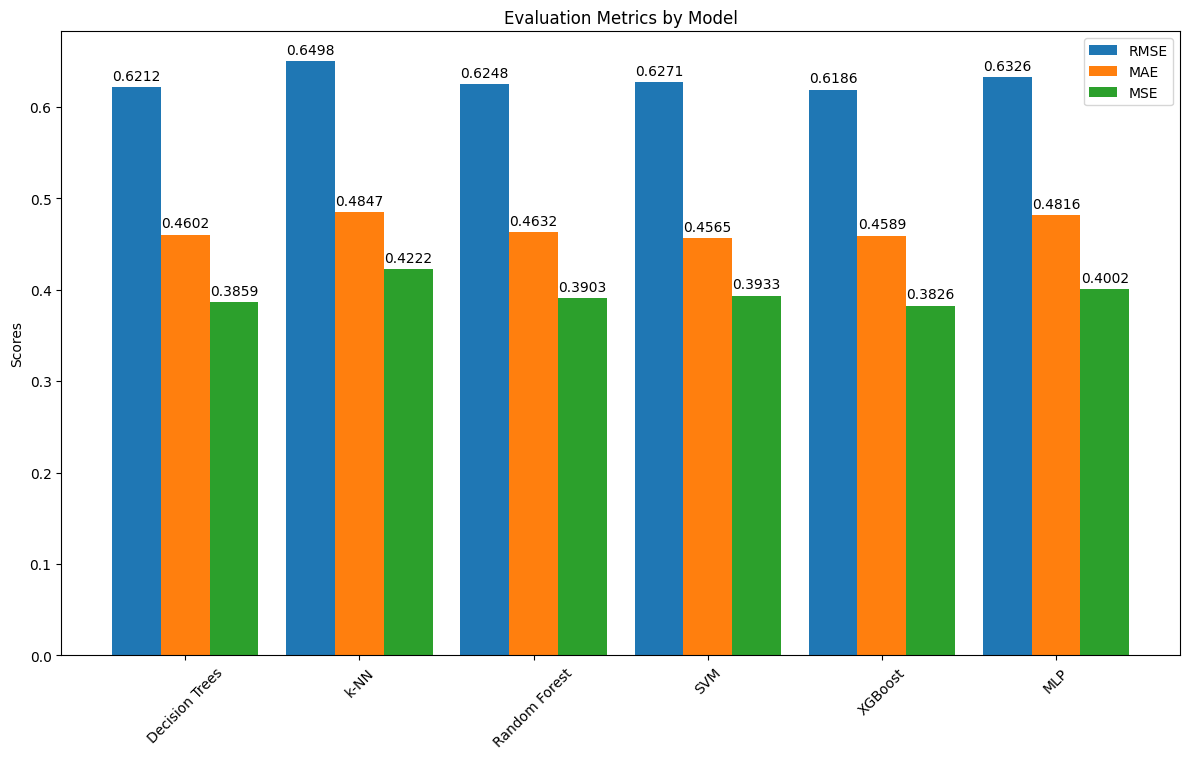

In [13]:

import matplotlib.pyplot as plt
import numpy as np

models = ['Decision Trees', 'k-NN', 'Random Forest', 'SVM', 'XGBoost', 'MLP']
rmse_values = [0.6212, 0.6498, 0.6248, 0.6271, 0.6186, 0.6326]
mae_values = [0.4602, 0.4847, 0.4632, 0.4565, 0.4589, 0.4816]
mse_values = [0.3859, 0.4222, 0.3903, 0.3933, 0.3826, 0.4002]

x = np.arange(len(models))
width = 0.28

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width, rmse_values, width, label='RMSE')
rects2 = ax.bar(x, mae_values, width, label='MAE')
rects3 = ax.bar(x + width, mse_values, width, label='MSE')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


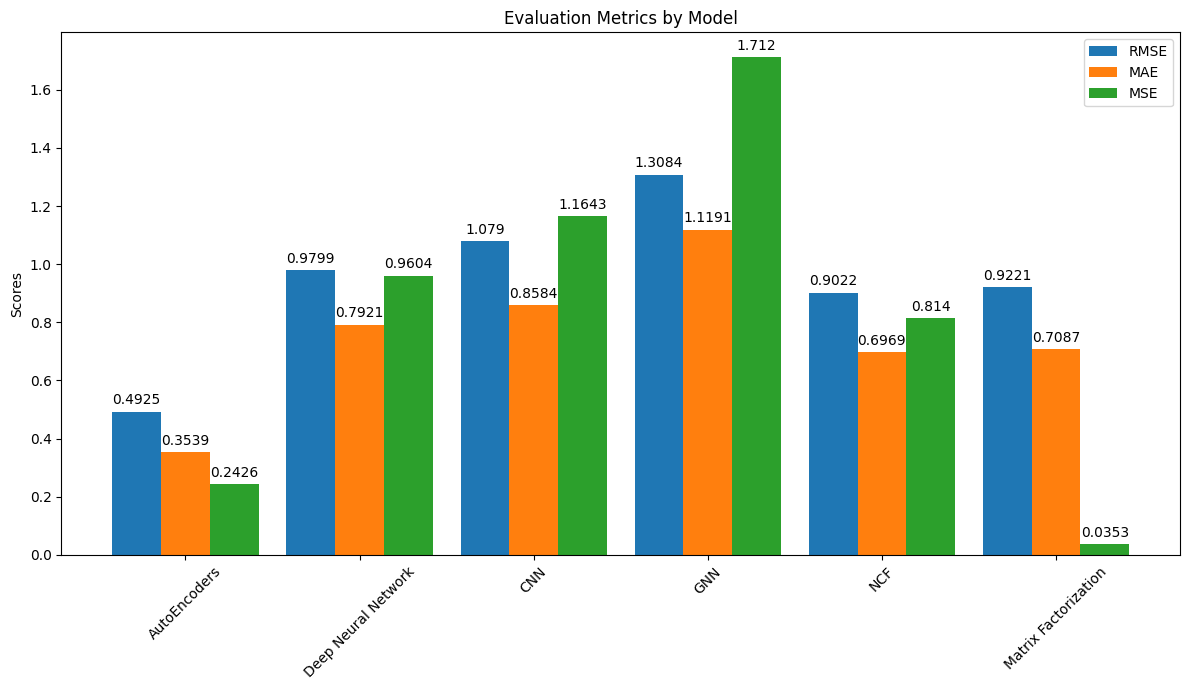

In [12]:
import matplotlib.pyplot as plt
import numpy as np

models = ['AutoEncoders', 'Deep Neural Network', 'CNN', 'GNN', 'NCF', 'Matrix Factorization']
rmse_values = [0.4925, 0.9799, 1.0790, 1.3084, 0.9022, 0.9221]
mae_values = [0.3539, 0.7921, 0.8584, 1.1191, 0.6969, 0.7087]
mse_values = [0.2426, 0.9604, 1.1643, 1.7120, 0.8140, 0.0353]

x = np.arange(len(models))
width = 0.28

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width, rmse_values, width, label='RMSE')
rects2 = ax.bar(x, mae_values, width, label='MAE')
rects3 = ax.bar(x + width, mse_values, width, label='MSE')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
